In [1]:
import cv2
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns


In [2]:
from skimage.feature import graycomatrix, graycoprops

In [3]:
def calculate_glcm(img_gray):
    glcm = graycomatrix(img_gray,  distances=[1], angles=[0], symmetric=True, normed=True)
    correlation = graycoprops(glcm, 'correlation')[0][0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    glcm_matrix = glcm[:,:,0,0]
    glcm_nonzero = glcm_matrix[glcm_matrix > 0]
    entropy = -np.sum(glcm_nonzero * np.log2(glcm_nonzero))
    
    glcm_mat = glcm[:,:,0,0]
    sum_avg = 0
    n = glcm_mat.shape[0]
    for i in range(2, 2*n + 1):
        p_x_y = 0
        for j in range(n):
            for k in range(n):
                if j + k + 2 == i:
                    p_x_y += glcm_mat[j, k]
        sum_avg += i*p_x_y
    sum_var = calculate_var(glcm_mat)
    
    return energy,correlation,entropy,sum_var,sum_avg

def calculate_var(glcm_matrix):
    size = glcm_matrix.shape[0]
    sum_entropy = 0
    for i in range(2, 2 * size + 1):
        p_x_y = 0
        for j in range(size):
            for k in range(size):
                if j + k + 2 == i:
                    p_x_y += glcm_matrix[j, k]
        if p_x_y > 0:
            sum_entropy -= p_x_y * np.log2(p_x_y)
    sum_var = 0
    for i in range(2, 2 * size + 1):
        p_x_y = 0
        for j in range(size):
            for k in range(size):
                if j + k + 2 == i:
                    p_x_y += glcm_matrix[j, k]
        if p_x_y > 0:
            sum_var += p_x_y * (i - sum_entropy)**2
    return sum_var
    
    

In [5]:
train_,test_ = [],[]

In [6]:
path = "./train/cats"
for f in os.listdir(path):
    img_path = os.path.join(path, f)
    img = cv2.imread(img_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    f1,f2,f3,f4,f5 = calculate_glcm(img_gray)
    a = np.array([f1,f2,f3,f4,f5,1])
#     print(a)
    train_.append(a)    
path1 = "./train/dogs"
for f in os.listdir(path1):
    img_path = os.path.join(path1, f)
    img = cv2.imread(img_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    f1,f2,f3,f4,f5 = calculate_glcm(img_gray)
    a = np.array([f1,f2,f3,f4,f5,0])
#     print(a)
    train_.append(a)  

[1.91460788e-02 9.83687248e-01 1.25842606e+01 8.06699200e+04
 2.67119019e+02 1.00000000e+00]
[2.28094836e-02 9.76191257e-01 1.24642853e+01 6.48002696e+04
 2.30094006e+02 1.00000000e+00]
[9.64047233e-03 9.02160633e-01 1.39651962e+01 5.66642464e+04
 2.14561626e+02 1.00000000e+00]
[4.60908119e-02 9.89630264e-01 1.07658140e+01 8.43537387e+04
 2.62140858e+02 1.00000000e+00]
[3.66836238e-02 9.82486444e-01 1.14894365e+01 5.23412672e+04
 2.04005705e+02 1.00000000e+00]
[1.83616616e-01 9.91676167e-01 9.01341806e+00 1.34821387e+05
 3.53835399e+02 1.00000000e+00]
[4.21430237e-02 9.95458864e-01 1.08170423e+01 1.29140574e+05
 3.47095818e+02 1.00000000e+00]
[3.67276745e-01 9.69341337e-01 9.08741594e+00 1.71047232e+05
 4.01228722e+02 1.00000000e+00]
[2.01571125e-02 9.85619070e-01 1.23806874e+01 8.02599260e+04
 2.58511526e+02 1.00000000e+00]


KeyboardInterrupt: 

In [7]:
df = pd.read_csv("my_data.csv")

In [10]:
df.head()

,F1,F2,F3,F4,F5,C
0,0.183617,0.991676,9.013418,134821.387154,353.835399,1.0
1,0.022809,0.976191,12.464285,64800.269571,230.094006,1.0
2,0.036684,0.982486,11.489437,52341.267166,204.005705,1.0
3,0.042143,0.995459,10.817042,129140.574357,347.095818,1.0
4,0.042280,0.985595,11.281864,90540.958010,287.414585,1.0


In [13]:
X = df[['F1', 'F2', 'F3', 'F4', 'F5']]
y = df['C']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Split complete: {X_train.shape[0]} train, {X_test.shape[0]} test samples")

Split complete: 55 train, 14 test samples


In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
for i in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=i).fit(X_train_scaled, y_train)
    y_hat = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_hat)
    print(f"accuracy :{acc}, when k is {i}")

accuracy :0.5714285714285714, when k is 1
accuracy :0.6428571428571429, when k is 2
accuracy :0.5, when k is 3
accuracy :0.5714285714285714, when k is 4
accuracy :0.5714285714285714, when k is 5
accuracy :0.5714285714285714, when k is 6
accuracy :0.5, when k is 7
accuracy :0.6428571428571429, when k is 8
accuracy :0.7142857142857143, when k is 9
accuracy :0.6428571428571429, when k is 10


In [35]:
knn = KNeighborsClassifier(n_neighbors=9).fit(X_train_scaled, y_train)
y_hat = knn.predict(X_test_scaled)

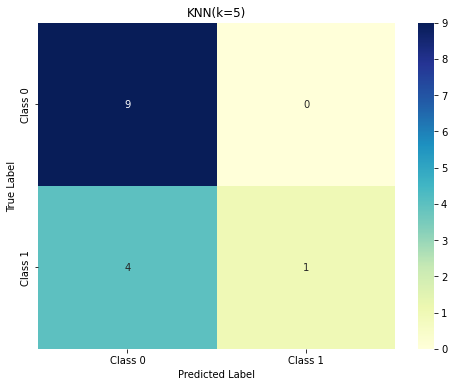

In [36]:
cm = confusion_matrix(y_test, y_hat)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='YlGnBu', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.title('KNN(k=5)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [59]:
df_test = pd.read_csv("test.csv")
df_test.shape

(24, 6)

In [52]:
test = scaler.fit_transform(df_test.iloc[:,:5])

In [53]:
y_hat_test = knn.predict(test)

In [55]:
acc = accuracy_score(df_test.iloc[:,-1], y_hat_test)

In [56]:
acc

0.625

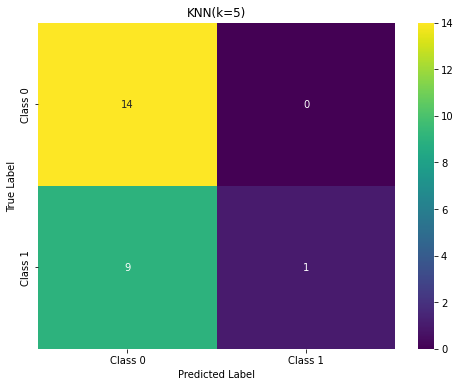

In [57]:
cm = confusion_matrix(df_test.iloc[:,-1], y_hat_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='viridis', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.title('KNN(k=5)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()